In [61]:
from keras.datasets import reuters
import numpy as np
import pandas as pd


#==============================ВХОДНЫЕ ДАННЫЕ==============================#

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(
    num_words=10000) # num_words-наиболее часто встречающиеся слова


#==============================ПРЕОБРАЗОВАНИЕ ВХОДНЫХ ДАННЫХ==============================#

def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# Векторизируем тестовые и контрольные данные

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

# либо так, но тогда фнкция потерь будет 'sparce_categorical_crossentropy'
# y_train = np.array(train_labels)
# y_test = np.array(test_labels)

from keras.utils.np_utils import to_categorical

one_hot_train_labels = to_categorical(train_labels) 
one_hot_test_labels = to_categorical(test_labels)

# Это то же самое что и приведённое ниже:
# def to_one_hot(labels, dimension=46):
#              results = np.zeros((len(labels), dimension))
#              for i, label in enumerate(labels):
#              results[i, label] = 1.
#              return results
# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

#==============================СОЗДАНИЕ СЕТИ (СЛОИ)==============================#

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))


#==============================СОЗДАНИЕ СЕТИ (КОМПИЛЯЦИЯ)==============================#

model.compile(optimizer='rmsprop',
 loss='categorical_crossentropy',
 metrics=['accuracy'])

 
#==============================ВАЛИДАЦИОННАЯ ВЫБОРКА (ПРОВЕРОЧНЫЙ НАБОР)==============================#

x_val = x_train[:1000]
partial_x_train = x_train[1000:]
y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


#==============================ОБУЧЕНИЕ==============================#

fitted_model = model.fit(partial_x_train,
                     partial_y_train,
                     epochs=20,
                     batch_size=512,
                     validation_data=(x_val, y_val))

C:\PROGRAMMS\PYTHON\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\PROGRAMMS\PYTHON\lib\site-packages\tensorflow\python\keras\datasets\reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


Epoch 1/20
16/16 [==============================] - 2s 133ms/step - loss: 2.5897 - accuracy: 0.5050 - val_loss: 1.7390 - val_accuracy: 0.6400
Epoch 2/20
16/16 [==============================] - 1s 36ms/step - loss: 1.3929 - accuracy: 0.7075 - val_loss: 1.2750 - val_accuracy: 0.7110
Epoch 3/20
16/16 [==============================] - 1s 37ms/step - loss: 1.0106 - accuracy: 0.7814 - val_loss: 1.1081 - val_accuracy: 0.7740
Epoch 4/20
16/16 [==============================] - 1s 36ms/step - loss: 0.7800 - accuracy: 0.8393 - val_loss: 1.0133 - val_accuracy: 0.7940
Epoch 5/20
16/16 [==============================] - 1s 34ms/step - loss: 0.6184 - accuracy: 0.8735 - val_loss: 0.9527 - val_accuracy: 0.8050
Epoch 6/20
16/16 [==============================] - 1s 36ms/step - loss: 0.4846 - accuracy: 0.9032 - val_loss: 0.9421 - val_accuracy: 0.7940
Epoch 7/20
16/16 [==============================] - 1s 36ms/step - loss: 0.3961 - accuracy: 0.9181 - val_loss: 0.9040 - val_accuracy: 0.8160
Epoch 8/20
1

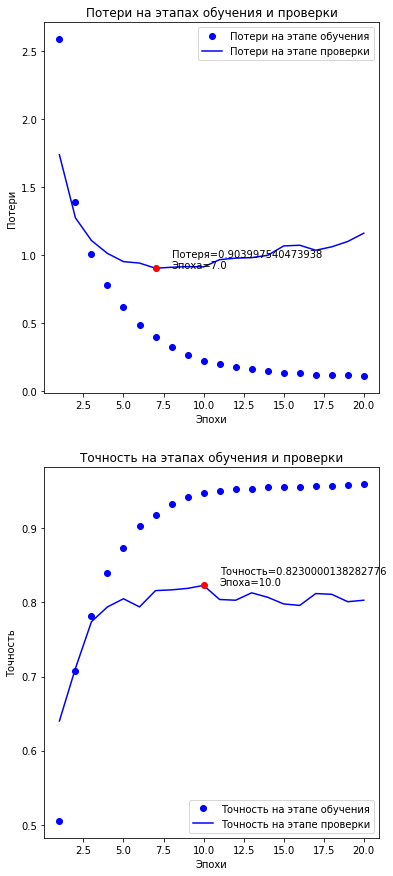

In [144]:
#==============================ВИЗУАЛИЗАЦИЯ ПОТЕРЬ И ТОЧНОСТИ==============================#

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

loss = fitted_model.history['loss']
val_loss = fitted_model.history['val_loss']
accuracy = fitted_model.history['accuracy']
val_accuracy = fitted_model.history['val_accuracy']
epochs = range(1, len(loss) + 1)

df = pd.DataFrame(fitted_model.history)
df['epochs'] = epochs
df.drop(['loss', 'accuracy'], axis=1, inplace=True)

dot_val_loss = df.loc[df.val_loss==min(df.val_loss), ['val_loss', 'epochs']].values[0,0]
dot_val_loss_epochs = df.loc[df.val_loss==min(df.val_loss), ['val_loss', 'epochs']].values[0,1]
dot_val_accuracy = df.loc[df.val_accuracy==max(df.val_accuracy), ['val_accuracy', 'epochs']].values[0,0]
dot_val_accuracy_epochs = df.loc[df.val_accuracy==max(df.val_accuracy), ['val_accuracy', 'epochs']].values[0,1]

fig=plt.figure(figsize = (6,15))

ax1=plt.subplot(211,title = 'Потери на этапах обучения и проверки',xlabel = 'Эпохи', ylabel = 'Потери')
ax1.plot(epochs, loss, 'bo', label='Потери на этапе обучения')
ax1.plot(epochs, val_loss, 'b', label='Потери на этапе проверки')
ax1.plot(dot_val_loss_epochs,dot_val_loss,'ro')
ax1.text(dot_val_loss_epochs+1,dot_val_loss,f'Потеря={dot_val_loss}\nЭпоха={dot_val_loss_epochs}')
ax1.legend()

ax2 = plt.subplot(212,title = 'Точность на этапах обучения и проверки',xlabel = 'Эпохи', ylabel = 'Точность')
ax2.plot(epochs, accuracy, 'bo', label='Точность на этапе обучения')
ax2.plot(epochs, val_accuracy, 'b', label='Точность на этапе проверки')
ax2.plot(dot_val_accuracy_epochs,dot_val_accuracy,'ro')
ax2.text(dot_val_accuracy_epochs+1,dot_val_accuracy,f'Точность={dot_val_accuracy}\nЭпоха={dot_val_accuracy_epochs}')
ax2.legend()

plt.show()

In [145]:
#==============================ОБУЧЕНИЕ НОВОЙ МОДЕЛИ С НУЖНЫМИ ЭПОХАМИ==============================#

model = models.Sequential()
model.add(layers.Dense(64, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
         loss='categorical_crossentropy',
         metrics=['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))


#==============================ФИНАЛЬНЫЙ ТЕСТ==============================#

results = model.evaluate(x_test, one_hot_test_labels) 


#==============================ПРЕДСКАЗАНИЯ НА НОВЫХ ДАННЫХ==============================#

predictions = model.predict(x_test)
np.argmax(predictions[0]) # выведем предсказанный класс первого предсказания

Epoch 1/9
16/16 [==============================] - 1s 85ms/step - loss: 2.5794 - accuracy: 0.5346 - val_loss: 1.7466 - val_accuracy: 0.6450
Epoch 2/9
16/16 [==============================] - 1s 47ms/step - loss: 1.4374 - accuracy: 0.7052 - val_loss: 1.3162 - val_accuracy: 0.7190
Epoch 3/9
16/16 [==============================] - 1s 38ms/step - loss: 1.0679 - accuracy: 0.7732 - val_loss: 1.1381 - val_accuracy: 0.7430
Epoch 4/9
16/16 [==============================] - 1s 38ms/step - loss: 0.8296 - accuracy: 0.8232 - val_loss: 1.0409 - val_accuracy: 0.7910
Epoch 5/9
16/16 [==============================] - 1s 48ms/step - loss: 0.6607 - accuracy: 0.8648 - val_loss: 0.9465 - val_accuracy: 0.8070
Epoch 6/9
16/16 [==============================] - 1s 40ms/step - loss: 0.5246 - accuracy: 0.8975 - val_loss: 0.9113 - val_accuracy: 0.8120
Epoch 7/9
16/16 [==============================] - 1s 38ms/step - loss: 0.4239 - accuracy: 0.9174 - val_loss: 0.8763 - val_accuracy: 0.8230
Epoch 8/9
16/16 [===

3